In [ ]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
print(d2)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

2022-11-13


In [ ]:
data = yf.download('MSN',
                      start=start_date,
                      end=end_date,
                      progress=False)
data["Date"] = data.index



In [ ]:
df=data['Close']

In [ ]:
df=pd.DataFrame(df)

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df

,Date,Close
0,2022-11-14,0.55
1,2022-11-15,0.56
2,2022-11-16,0.56
3,2022-11-17,0.56
4,2022-11-18,0.56
...,...,...
245,2023-11-06,0.55
246,2023-11-07,0.55
247,2023-11-08,0.56
248,2023-11-09,0.55


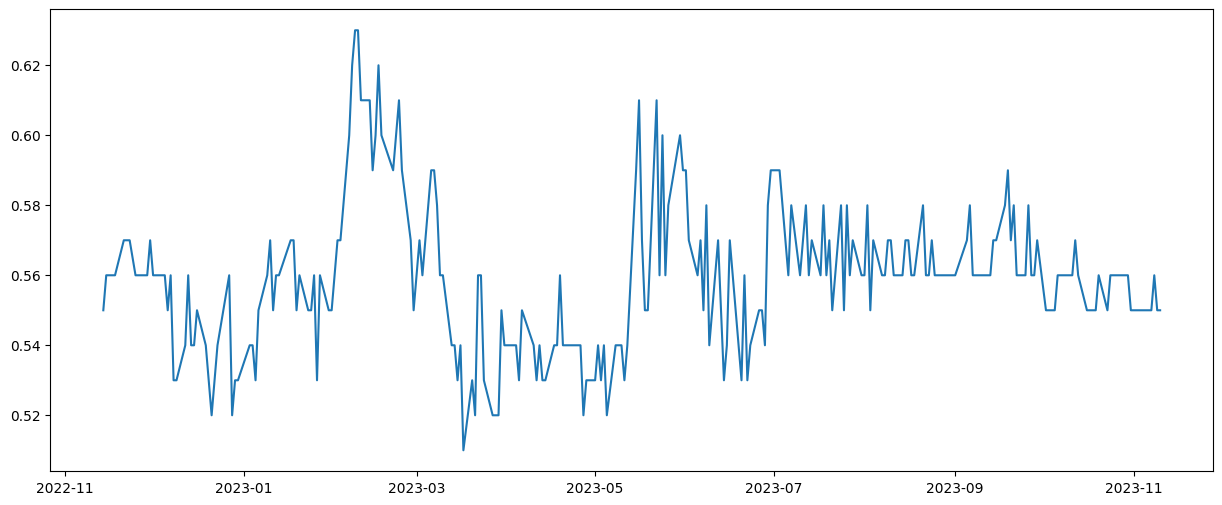

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.plot(df['Date'],df['Close'])

<Figure size 640x480 with 0 Axes>

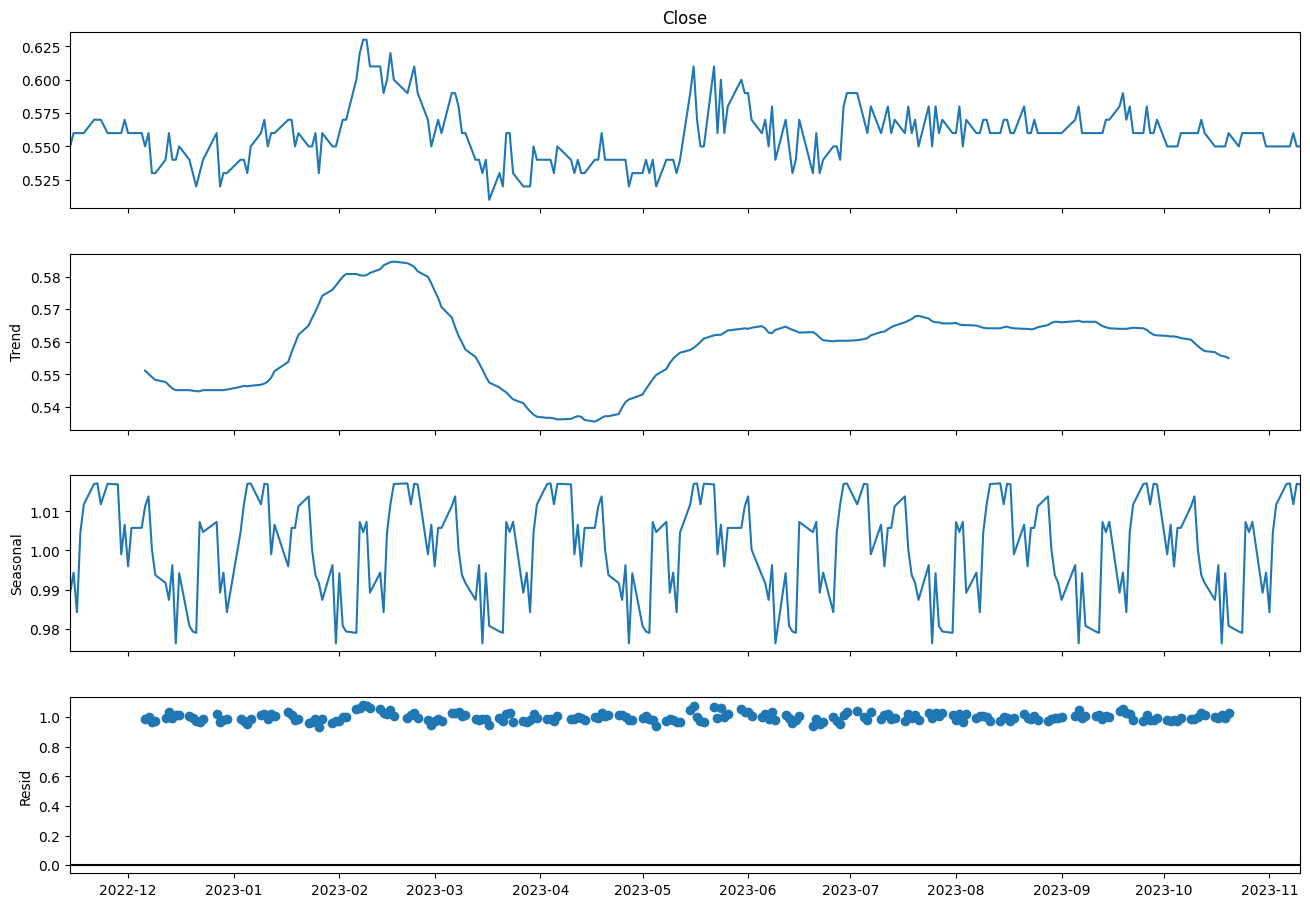

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"],
                            model='multiplicative', period = 30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 10)

Text(0, 0.5, 'lag-time')

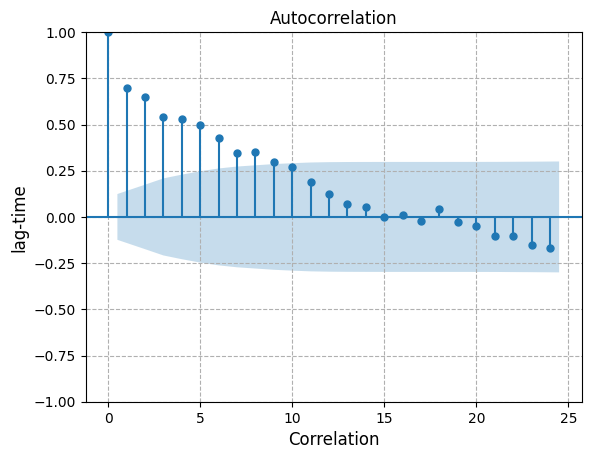

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['Close'])
plt.grid(linestyle='--')
plt.xlabel('Correlation',fontsize=12)
plt.ylabel('lag-time',fontsize=12)

Text(0, 0.5, 'lag-time')

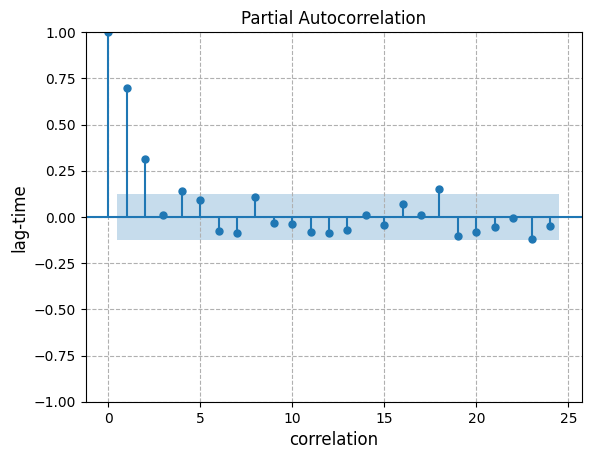

In [ ]:
plot_pacf(df['Close'])
plt.grid(linestyle='--')
plt.xlabel('correlation',fontsize=12)
plt.ylabel('lag-time',fontsize=12)

In [ ]:
df_train,df_test=df[:int(len(df)*0.9)],df[int(len(df)*0.9):]
print(df_test)

          Date  Close
225 2023-10-09   0.56
226 2023-10-10   0.56
227 2023-10-11   0.56
228 2023-10-12   0.57
229 2023-10-13   0.56
230 2023-10-16   0.55
231 2023-10-17   0.55
232 2023-10-18   0.55
233 2023-10-19   0.55
234 2023-10-20   0.56
235 2023-10-23   0.55
236 2023-10-24   0.56
237 2023-10-25   0.56
238 2023-10-26   0.56
239 2023-10-27   0.56
240 2023-10-30   0.56
241 2023-10-31   0.55
242 2023-11-01   0.55
243 2023-11-02   0.55
244 2023-11-03   0.55
245 2023-11-06   0.55
246 2023-11-07   0.55
247 2023-11-08   0.56
248 2023-11-09   0.55
249 2023-11-10   0.55


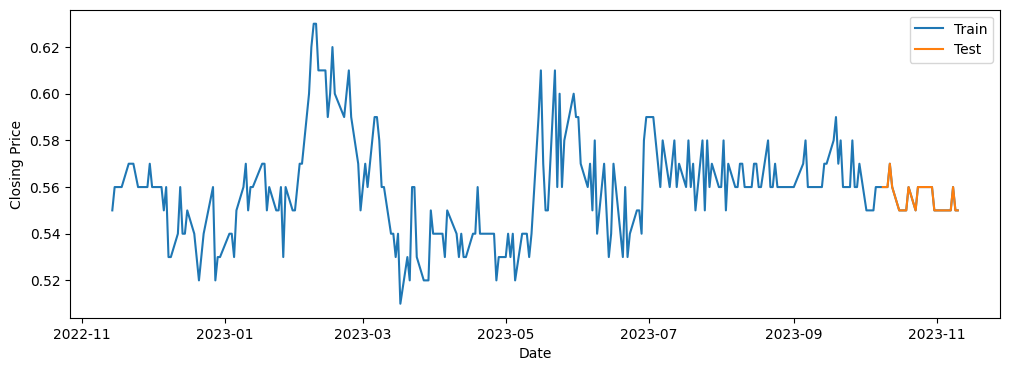

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(df['Date'],df['Close'],label='Train')
plt.plot(df_test['Date'],df_test['Close'],label='Test')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [ ]:
!pip install pmdarima

In [ ]:
import pmdarima as pm

In [ ]:
from pmdarima.arima import auto_arima
model_arima=auto_arima(df_train['Close'],start_p=0, start_q=0, max_p=3, max_q=3, m=12, seasonal=True, stepwise=True, trace=True)


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=-1072.001, Time=1.65 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-1075.899, Time=0.08 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.98 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-1151.473, Time=0.83 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=379.129, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=-1151.096, Time=0.13 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=-1147.277, Time=0.96 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=-1150.047, Time=4.01 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=-950.468, Time=2.04 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=inf, Time=6.63 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=-1078.244, Time=1.10 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=-1244.271, Time=3.85 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=-1243.810, Time=1.00 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=-1240.546, Time=3.59 sec
 ARIMA(1,0,1)(0,0,2)

In [ ]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df_train['Close'],order=(2,0,0),seasonal_order=(0,0,0,12))
fitted=model.fit()
pred = fitted.forecast(len(df_test['Close']))

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
pred=fitted.forecast(len(df_test))
print(pred)

225    0.555656
226    0.557328
227    0.556477
228    0.556685
229    0.556448
230    0.556398
231    0.556269
232    0.556174
233    0.556064
234    0.555961
235    0.555855
236    0.555750
237    0.555645
238    0.555539
239    0.555434
240    0.555329
241    0.555224
242    0.555119
243    0.555014
244    0.554909
245    0.554804
246    0.554699
247    0.554594
248    0.554489
249    0.554384
Name: predicted_mean, dtype: float64


In [ ]:
pred_1=fitted.predict(len(df['Close']),len(df['Close'])+10)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
rmse=math.sqrt(mean_squared_error(df_test['Close'],pred))
print(rmse)

0.005477665299878205


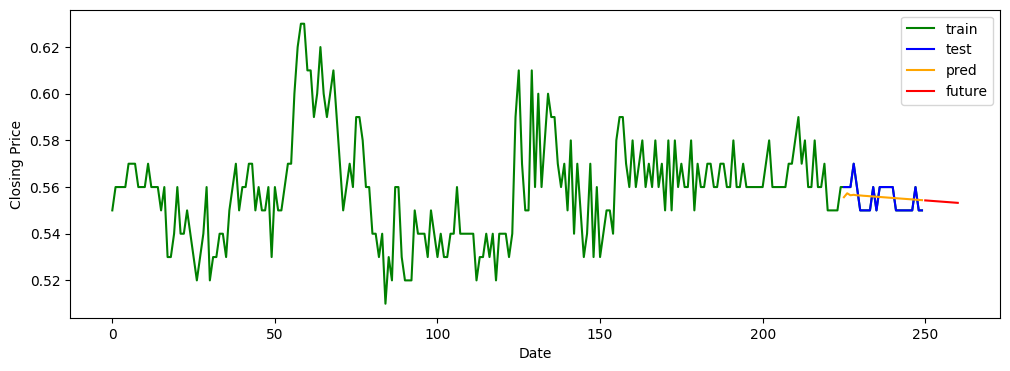

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(df['Close'],label='train',color='green')
plt.plot(df_test['Close'],label='test',color='blue')
plt.plot(pred,label='pred',color='orange')
plt.plot(pred_1,label='future',color='red')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

